# DMSS Bayesian Decision Analysis Case Study

Adam Novotny

For this project, we are analyzing a problem facing Falmouth, MA. The community had high nitrogen discharge into the ocean from its septic systems and needed to replace them with a new wastewater management technology. Given the data on each possible solution (cost, nitrogen mitigated, and adoption probabilities), we assessed the expected costs and benefits of each option, found the value of collecting more information, and proposed how to use the results for making a decision.

### Results

The results show the expected values for `average cost`, `N mitigated`, and `$/N mitigated` for each branch of our decision tree. The committee can use these values to inform their decision.

I disagree with the choice to select the preferred solution by cost, because then the solution will always be `Do Nothing` which results in no mitigation of nitrogen. We are considering new wastewater management systems to mitigate nitrogen runoff, so doing nothing cannot be the best decision. I think `$/N mitigated` is the best criteria from the given information, and a better utility function could be created with more information.

The results of this analysis show very favorably towards the Blackwater Digester. While it is in the middle for cost, it has excellent nitrogen mitigation and will force 100% adoption. While the composting toilets have similar N mitigation capabilities and are cheaper, the estimated probability of adoption is very low (`E(p) = 0.3`, Figure 1), therefore its `cost / N mitigated` is the highest of the three options. Because the prior estimate is so low, when surveying 10 houses all branches still show the Digester as the best choice on `$/N mitigated`. Only when surveying all houses, one would need to have >40 houses build Composting toilets to choose them above the Digester (Figure 2). With the low probability of >40 houses choosing to adopt Composting toilets, the value of survey all houses is a mere $2.11 per house.


### Critique of the approach

The primary criteria that this approach considers is the cost to the property owners. While this is important to value, there are many more criteria that need to be considered before making a decision. The merit to this approach is that it can tell you exactly how much you can expect the project to cost, and how much nitrogen each option would mitigate.

There are many deficits to this approach, and I would expect that the local community would want the committee to consider additional info before making a decision.

There are many quality of life differences that are not accounted for in this approach. If I was investing into a system, I would want something that doesn’t require large, loud, smelly trucks to extract my poops regularly. The value of not having to schedule or interact with septic trucks is high for me, and should be added to the equation. Additionally, I expect reliability to be a high priority for residents, especially in winter months. People seem to have loud opinions for or against composting toilets, so the committee should consider whether to even consider composting toilets publicly and have to deal with a bunch of people coming to their public hearings.

Most importantly, the value of mitigating nitrogen is not taken into consideration with the given data. Not only for conservation, but also the consequences of environmental decline (tourism, seafood industry, residents’ heath, etc) are not taken into account.

There are two alternatives to ranking solutions by `$/N mitigated`. If the EPA had a suggested minimum acceptable `N mitigated` for the whole community, the right criteria might be `Total Cost for minimum compliance` (Figure 3). This again would only be looking at the property owner’s costs, and not take into consideration the value of mitigating nitrogen.

Ultimately defining a utility function (of $ and N) that values the `N Mitigated` with its total impact would be the best way to compare the options. This could be non-linear, valuing each additional kg mitigated less than the previous one. To estimate this we would need to survey all relevant stakeholders (conservationists, local industries, health experts, etc) and aggregate their input.

Therefore, the committee should use the decision tree and expected values as one of many criteria for choosing which wastewater solution to build.


### Figure 1
![P(a|test0) plot](https://i.imgur.com/XZcKuA8.png)

### Figure 2
![$/N mitigated plot](https://imgur.com/XmISpeW.png)

### Figure 3
![N mitigated plot](https://imgur.com/isvOYbS.png)

### Figure 4
![decision tree](https://imgur.com/67zNKze.png)

([decision tree source](https://miro.com/app/board/o9J_khCstJ8=/))

# Code

## Setup
Import data into pandas DataFrames

Import python libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import comb 

In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

Import data from google sheets

In [ ]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/13X5-sfJwTSa0K1EIQ8p8JVTYzrWmZiUpYOc9ciOILls/edit#gid=329581127')
sheet = wb.worksheet("Data")
data = pd.DataFrame(sheet.get_all_values())
data.columns = data.iloc[0]
data = data.iloc[1:] # Throw away first two rows
data

0         Name  Cost    N     $/N   Composting Toilet Adoption     p P(P=p)
1         WWTP  3590  5.9  608.47                                  0   0.00
2      Compost  1985  6.3  315.08                               0.05   0.04
3       Septic   928    0    0.00                                0.1   0.09
4   Blackwater  2352  6.6  356.36                               0.15   0.11
5                                                                0.2   0.12
6                                                               0.25   0.12
7                                                                0.3   0.11
8                                                               0.35   0.10
9                                                                0.4   0.08
10                                                              0.45   0.07
11                                                               0.5   0.05
12                                                              0.55   0.04
13                                                               0.6   0.03
14                                                              0.65   0.02
15                                                               0.7   0.01
16                                                              0.75   0.01
17                                                               0.8   0.00
18                                                              0.85   0.00
19                                                               0.9   0.00
20                                                              0.95   0.00
21                                                                 1   0.00

Massage google sheets data into pandas DataFrames, with proper types.

In [ ]:
# Import solution data and convert to numeral
sols = data.loc[:4, ('Name', 'Cost', 'N')].set_index('Name')

for col in ['Cost', 'N']:
  sols[col] = pd.to_numeric(sols[col], errors='coerce')
sols["$/N"] = sols['Cost'] / sols['N']


# Import adoption probability data and convert to numeral
ps = data.loc[:, ('p', 'P(P=p)')]
for col in ['p', 'P(P=p)']:
  ps[col] = pd.to_numeric(ps[col], errors='coerce')

# sols[sols["Name"] == "W"].Cost

In [ ]:
def E_binomial(total, chosen, p):
  return comb(total, chosen, exact=True) * (p**chosen) * ((1-p)**(total-chosen))

## No survey composting adoption



Given the probabilities of adoption, calculate the probabilities of `a` houses out of 50 adopting composting toilets.

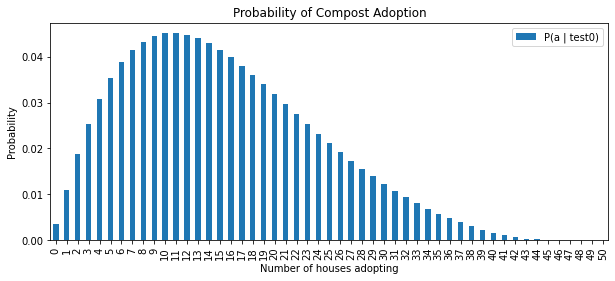

In [ ]:
n_houses = 50
dry_adoption = pd.DataFrame()
dry_adoption['a'] = range(n_houses + 1) # a= num houses adopted (0 to 50)

def calc_p_a_test0(a):
  return ps.apply((lambda x: E_binomial(n_houses, a, x['p']) * x['P(P=p)']), axis=1).sum()

dry_adoption['P(a | test0)'] = dry_adoption['a'].apply(calc_p_a_test0)


dry_adoption.plot(x='a', y='P(a | test0)', kind="bar", figsize=(10,4), 
                  xlabel='Number of houses adopting', ylabel='Probability', title="Probability of Compost Adoption")
# dry_adoption.loc[:, 'P(a | test0)']

Find expected values of adopting composting toilets using predicted adoption probabilities (no testing).

In [ ]:
test0 = {}
test0['E(houses)'] = (dry_adoption['a'] * dry_adoption['P(a | test0)']).sum()
test0['E(cost)'] = ((((dry_adoption['a'] * sols.loc['Compost'].Cost) + ((n_houses - dry_adoption['a']) * sols.loc['Septic'].Cost))/n_houses) * dry_adoption['P(a | test0)']).sum()
test0['E(N mitigated)'] = ((((dry_adoption['a'] * sols.loc['Compost'].N) + ((n_houses - dry_adoption['a']) * sols.loc['Septic'].N))/n_houses) * dry_adoption['P(a | test0)']).sum()
test0['E($/N)'] = test0["E(cost)"] / test0["E(N mitigated)"]

test0

{'E($/N)': 649.943366326345,
 'E(N mitigated)': 1.9246500000000004,
 'E(cost)': 1250.9135,
 'E(houses)': 15.275000000000002}

## Survey 10 composting adoption

Find probabilities and expected values after testing n=10 houses.

In [ ]:
n_test = 10  # Number of houses to survey

testN_ps = pd.DataFrame(ps.p)
testN_E = pd.DataFrame(columns=["P(S=a)", "E(houses)", "E(cost)", "E(N mitigated)", "E($/N)"])

for a in range(n_test + 1):
  ps_test = ps.apply((lambda x: E_binomial(n_test, a, x['p']) * x['P(P=p)']), axis=1)

  ps_label = "P''(P=p|S{}={})".format(n_test, a)
  testN_ps[ps_label] = ps_test / ps_test.sum() # normalize probabilities to sum to 1


  # Note that expected values are calculated linearly off of expected adoption probability. This works because $ and N mitigated scale linearly with adoption.
  # If they didn't we'd have to calculate these values for each a=n and multiply by the P(a=n)
  
  E_p = (testN_ps[ps_label] * testN_ps['p']).sum()                                                # Expected ratio of houses adopting compost
  new_row = {}
  new_row["P(S=a)"] = ps_test.sum()                                           # Probability of 'a' houses adopting compost from the survey
  new_row["E(houses)"] = n_houses * E_p                                       # Expected number of houses adopting compost
  new_row["E(cost)"] = (E_p * sols.loc['Compost'].Cost) + (1 - E_p) * sols.loc['Septic'].Cost
  new_row["E(N mitigated)"] = (E_p * sols.loc['Compost'].N) + (1 - E_p) * sols.loc['Septic'].N
  new_row["E($/N)"] = new_row["E(cost)"] / new_row["E(N mitigated)"]
  
  testN_E = testN_E.append(new_row, ignore_index=True)
  
testN_E

0: 1     0.000000e+00
2     2.352370e-01
3     3.082316e-01
4     2.127118e-01
5     1.265583e-01
6     6.637483e-02
7     3.051987e-02
8     1.322340e-02
9     4.751296e-03
10    1.741544e-03
11    4.796005e-04
12    1.337811e-04
13    3.089803e-05
14    5.419011e-06
15    5.799922e-07
16    9.367197e-08
17    0.000000e+00
18    0.000000e+00
19    0.000000e+00
20    0.000000e+00
21    0.000000e+00
Name: P''(P=p|S10=0), dtype: float64
1: 1     0.000000
2     0.075759
3     0.209564
4     0.229692
5     0.193604
6     0.135383
7     0.080037
8     0.043569
9     0.019382
10    0.008719
11    0.002935
12    0.001001
13    0.000284
14    0.000062
15    0.000008
16    0.000002
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
Name: P''(P=p|S10=1), dtype: float64
2: 1     0.000000
2     0.016350
3     0.095479
4     0.166209
5     0.198467
6     0.185046
7     0.140652
8     0.096199
9     0.052984
10    0.029252
11    0.012034
12    0.005014
13    0.001744
14    0.

P(S=a)  E(houses)      E(cost)  E(N mitigated)       E($/N)
0   0.101810   6.660071  1068.793910        0.839169  1273.633691
1   0.166383   9.246816  1123.477697        1.165099   964.276714
2   0.182593  12.083570  1183.446679        1.522530   777.289626
3   0.168148  15.008846  1245.287015        1.891115   658.493661
4   0.137963  17.988056  1308.267513        2.266495   577.220532
5   0.102733  21.011791  1372.189256        2.647486   518.299038
6   0.069307  24.045495  1436.321757        3.029732   474.075463
7   0.041394  26.994081  1498.654878        3.401254   440.618305
8   0.020636  29.694638  1555.744637        3.741524   415.805031
9   0.007552  31.967856  1603.800482        4.027950   398.167933
10  0.001482  33.712431  1640.680784        4.247766   386.245542

Calculate the value of testing 10 houses. This was not carried out because, as seen in the table above, for all outcomes `$/N mitigated` is higher than the best option Blackwater system at `$356.36/kg of N mitigated`.

Cost by itself is not a good measure to evaluate by because no change (continuing to use septic) is the cheapest option, but it would mitigate no Nitrogen runoff.

In [ ]:
# Calculate value of test
testN_overall = {}

## Perfect information composting toilet adoption

Find expected cost of composting toilets if we 
survey all houses. We then use the estimated values for `P(a)` to calculate the value of perfect information.

In [ ]:
surveyAll = pd.DataFrame()

surveyAll['a'] = range(n_houses + 1)
surveyAll['p'] = dry_adoption['P(a | test0)']
surveyAll['Cost'] = surveyAll['a'].apply(lambda a: ((a * sols.loc['Compost'].Cost) + (n_houses - a) * sols.loc['Septic'].Cost)/n_houses)
surveyAll['N mitigated'] = surveyAll['a'].apply(lambda a: ((a * sols.loc['Compost'].N) + (n_houses - a) * sols.loc['Septic'].N)/n_houses)
surveyAll['$/N'] = surveyAll['Cost'] / surveyAll['N mitigated']

And calculate the value of perfect information.

     a             p     Cost  N mitigated         $/N
40  40  1.606981e-03  1773.60        5.040  351.904762
41  41  1.042614e-03  1794.74        5.166  347.413860
42  42  6.124187e-04  1815.88        5.292  343.136810
43  43  3.194741e-04  1837.02        5.418  339.058693
44  44  1.449398e-04  1858.16        5.544  335.165945
45  45  5.580723e-05  1879.30        5.670  331.446208
46  46  1.768172e-05  1900.44        5.796  327.888199
47  47  4.417073e-06  1921.58        5.922  324.481594
48  48  8.145692e-07  1942.72        6.048  321.216931
49  49  9.848719e-08  1963.86        6.174  318.085520
50  50  5.852155e-09  1985.00        6.300  315.079365
0.0038052520346541106
2.1115537503908985


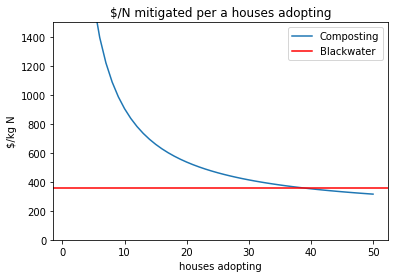

In [ ]:
cheaper_then_blackwater = surveyAll[surveyAll['$/N'] < sols.loc['Blackwater']['$/N']]
print(cheaper_then_blackwater)
print(cheaper_then_blackwater['p'].sum())

print(((sols.loc['Blackwater'].Cost - cheaper_then_blackwater['Cost']) * cheaper_then_blackwater['p']).sum())


# Plot composting vs blackwater
fig = plt.figure()
plt.plot(surveyAll['$/N'], label="Composting")
plt.axhline(sols.loc['Blackwater']['$/N'], color='red', label="Blackwater")
plt.ylim(0,1500)

plt.title("$/N mitigated per a houses adopting")
plt.xlabel("houses adopting")
plt.ylabel("$/kg N")
plt.legend()
plt.show()

The table above shows that you need 40 or more houses to adopt composting toilets to get better `$/kg N mitigated` than a Blackwater system, and the overall chance of that happening is `0.003`. 

By multiplying the amount saved by composting toilets (compared to a Blackwater system) by the probability of that adoption we can find the value of perfect information. These numbers are very small, which makes the value of full information `$2.11`.

This would be much higher if we accepted composting toilets above a certain value of N mitigated. Picking an arbitrary minimum value of 4kg N mitigated per household, only 32 houses would need to adopt composting toilets to satisfy the regulations, which brings the probability of this happening up to `0.048`, netting us a savings of `$32.73` with perfect information.

     a             p     Cost  N mitigated         $/N
32  32  9.388536e-03  1604.48        4.032  397.936508
33  33  8.079322e-03  1625.62        4.158  390.962001
34  34  6.876766e-03  1646.76        4.284  384.397759
35  35  5.783086e-03  1667.90        4.410  378.208617
36  36  4.790355e-03  1689.04        4.536  372.363316
37  37  3.883234e-03  1710.18        4.662  366.833977
38  38  3.048189e-03  1731.32        4.788  361.595656
39  39  2.284169e-03  1752.46        4.914  356.625967
40  40  1.606981e-03  1773.60        5.040  351.904762
41  41  1.042614e-03  1794.74        5.166  347.413860
42  42  6.124187e-04  1815.88        5.292  343.136810
43  43  3.194741e-04  1837.02        5.418  339.058693
44  44  1.449398e-04  1858.16        5.544  335.165945
45  45  5.580723e-05  1879.30        5.670  331.446208
46  46  1.768172e-05  1900.44        5.796  327.888199
47  47  4.417073e-06  1921.58        5.922  324.481594
48  48  8.145692e-07  1942.72        6.048  321.216931
49  49  9.

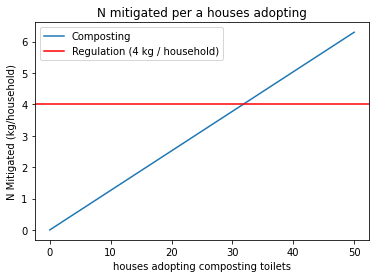

In [ ]:
composting_above4 = surveyAll[surveyAll['N mitigated'] > 4]
print(composting_above4)
print(composting_above4['p'].sum())
print(((sols.loc['Blackwater'].Cost - composting_above4['Cost']) * composting_above4['p']).sum())

# Plot composting vs 4 kg
fig = plt.figure()
plt.plot(surveyAll['N mitigated'], label="Composting")
plt.axhline(4, color='red', label="Regulation (4 kg / household)")
# plt.ylim(0,1500)

plt.title("N mitigated per a houses adopting")
plt.xlabel("houses adopting composting toilets")
plt.ylabel("N Mitigated (kg/household)")
plt.legend()
plt.show()

In [ ]:
composting_cheapest = surveyAll[surveyAll['Cost'] < sols.loc['Blackwater'].Cost]
print(composting_cheapest)
print(composting_cheapest['p'].sum())
print(((sols.loc['Blackwater'].Cost - composting_cheapest['Cost']) * composting_cheapest['p']).sum())

     a             p     Cost  N mitigated          $/N
0    0  3.575956e-03   928.00        0.000          inf
1    1  1.098601e-02   949.14        0.126  7532.857143
2    2  1.884089e-02   970.28        0.252  3850.317460
3    3  2.534728e-02   991.42        0.378  2622.804233
4    4  3.073710e-02  1012.56        0.504  2009.047619
5    5  3.527545e-02  1033.70        0.630  1640.793651
6    6  3.886174e-02  1054.84        0.756  1395.291005
7    7  4.148213e-02  1075.98        0.882  1219.931973
8    8  4.329319e-02  1097.12        1.008  1088.412698
9    9  4.445672e-02  1118.26        1.134   986.119929
10  10  4.506562e-02  1139.40        1.260   904.285714
11  11  4.517162e-02  1160.54        1.386   837.330447
12  12  4.482069e-02  1181.68        1.512   781.534392
13  13  4.406438e-02  1202.82        1.638   734.322344
14  14  4.295780e-02  1223.96        1.764   693.854875
15  15  4.155569e-02  1245.10        1.890   658.783069
16  16  3.991015e-02  1266.24        2.016   628